# **Document Loading Using LangChain**

### Retrieval Augmented Generation
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).

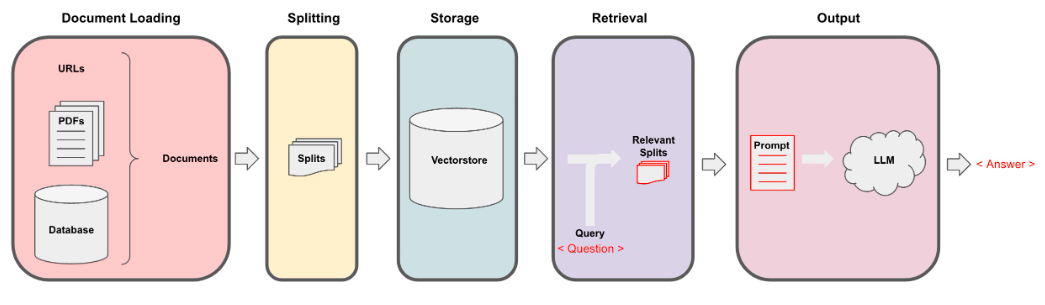

### Install Dependencies

In [ ]:
! pip install -q langchain
! pip install -q pypdf
! pip install -q yt_dlp
! pip install -q pydub

### Integrating API Key

In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

### Importing Essentials

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("Docs/Lectures/MachineLearning.pdf")
pages = loader.load()

### Checking Length

In [ ]:
len(pages)

### Storing Pages In A Variable

In [ ]:
page = pages[0]

### Running That Variable

In [ ]:
print(page.page_content[0:500])

### Printing Extra Data

In [ ]:
page.metadata

### Working With YouTube

In [ ]:
from langchain.document_loaders.generic import GenericLoader,  FileSystemBlobLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

### Providing Link Of A Video

In [ ]:
url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),  # Fetch From Youtube
    # FileSystemBlobLoader(save_dir, glob="*.m4a"),  # Fetch Locally
    OpenAIWhisperParser()
)
docs = loader.load()

### Printing The Process

In [ ]:
docs[0].page_content[0:500]

### Working With URLs

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/titles-for-programmers.md")

### Storing Loader In A Variable

In [ ]:
docs = loader.load()

### Running That Variable

In [ ]:
print(docs[0].page_content[:500])

### Working With Notion

In [ ]:
image.png
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("Docs/Notion")
docs = loader.load()

### Printing The Result

In [ ]:
print(docs[0].page_content[0:200])

### Extra Data (Source)

In [ ]:
docs[0].metadata

### The End...